In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

## step 1 : reading the data

In [2]:
df = pd.read_csv("C:\\Users\\KARAN S07\\Desktop\\Final Year\\Deep Learning\\TF-Course-Notebooks\\TF_Course_Notebooks\\DATA\\fake_reg.csv")

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


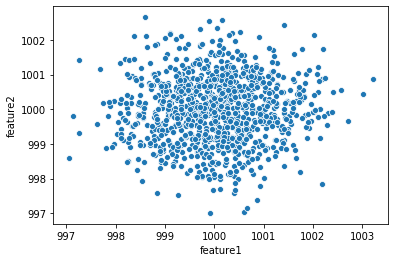

In [4]:
sns.scatterplot(x="feature1",y="feature2",data=df)

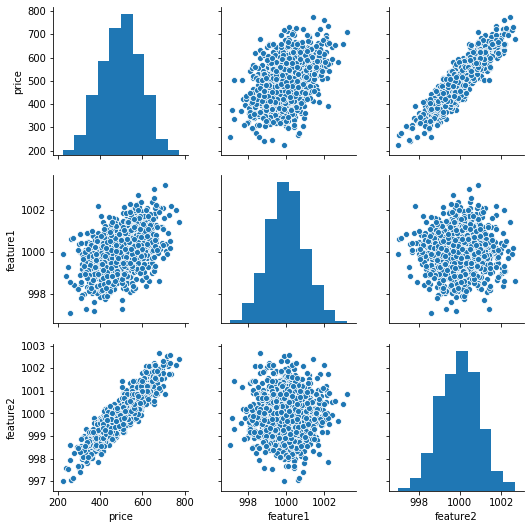

In [5]:
sns.pairplot(df)

## Step 2: Converting data into train and test data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:


X = np.array(df[['feature1','feature2']])#since input is two dimensional upper case X
y = np.array(df["price"])# since output vector is 1 dim, lowercase y

xtrain,xtest,ytrain,ytest = train_test_split(X,y)

In [8]:
print(xtrain.shape)
print(xtest.shape)

(750, 2)
(250, 2)


## step 3: Normalize the data

In [9]:
from sklearn.preprocessing import MinMaxScaler

#### MinMaxScaler
class sklearn.preprocessing. MinMaxScaler (feature_range=(0, 1), copy=True)[source] Transforms features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [10]:
scaler  = MinMaxScaler()

In [11]:
scaler.fit(xtrain)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
# We don't want the model to get a intuition about the training data therefore only xtrain is used to fit the
# scaler

xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [13]:
xtrain.min()

0.0

In [14]:
xtest.max()

1.0186515935232023

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Dense
Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

In [19]:
#help(Sequential)

In [22]:
# 1st way create sequential model and pass in list of layers to be added
model = Sequential([Dense(units = 4,activation="relu"),
                   Dense(units = 2, activation='relu'),
                   Dense(1)])
# parameters units = number of neurons in the layer
# activation = activation function to be used



In [27]:
# 2nd way is to create a Sequential model and keep on adding the layers

model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))



model.add(Dense(1)) # Output layer

# compiling a model
model.compile(optimizer="rmsprop",
             loss="mse")

# Parameters :
# 1) optimizer : Which optimizer should be used to add momentum to gradient descent, default is rmsprop
# 2) loss : Loss function to be used to evaluate the prediction 

## Choosing an optimizer and loss



#### For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

#### For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

#### For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [30]:
model.fit(xtrain,ytrain,epochs=250)
# paramter verbose controls the output report
# higher the verbose number more information will be printedd

Train on 750 samples
Epoch 1/250
750/750 [==============================] - 0s 256us/sample - loss: 254357.1350
Epoch 2/250
750/750 [==============================] - 0s 239us/sample - loss: 253991.8319
Epoch 3/250
750/750 [==============================] - 0s 252us/sample - loss: 253585.3981
Epoch 4/250
750/750 [==============================] - 0s 246us/sample - loss: 253136.6012
Epoch 5/250
750/750 [==============================] - 0s 227us/sample - loss: 252640.5136
Epoch 6/250
750/750 [==============================] - 0s 254us/sample - loss: 252091.5008
Epoch 7/250
750/750 [==============================] - 0s 255us/sample - loss: 251489.5841
Epoch 8/250
750/750 [==============================] - 0s 180us/sample - loss: 250825.6370
Epoch 9/250
750/750 [==============================] - 0s 220us/sample - loss: 250102.9917
Epoch 10/250
750/750 [==============================] - 0s 181us/sample - loss: 249314.0334
Epoch 11/250
750/750 [==============================] - 0s 177us/sam

750/750 [==============================] - 0s 79us/sample - loss: 1046.8202
Epoch 92/250
750/750 [==============================] - 0s 69us/sample - loss: 1024.2788
Epoch 93/250
750/750 [==============================] - 0s 81us/sample - loss: 1002.5000
Epoch 94/250
750/750 [==============================] - 0s 79us/sample - loss: 977.7387
Epoch 95/250
750/750 [==============================] - 0s 81us/sample - loss: 951.7374
Epoch 96/250
750/750 [==============================] - 0s 80us/sample - loss: 933.5252
Epoch 97/250
750/750 [==============================] - 0s 71us/sample - loss: 907.4750
Epoch 98/250
750/750 [==============================] - 0s 68us/sample - loss: 886.9608
Epoch 99/250
750/750 [==============================] - 0s 71us/sample - loss: 863.1894
Epoch 100/250
750/750 [==============================] - 0s 77us/sample - loss: 840.1051
Epoch 101/250
750/750 [==============================] - 0s 80us/sample - loss: 817.0331
Epoch 102/250
750/750 [=================

750/750 [==============================] - 0s 79us/sample - loss: 24.8748
Epoch 184/250
750/750 [==============================] - 0s 79us/sample - loss: 24.7947
Epoch 185/250
750/750 [==============================] - 0s 77us/sample - loss: 24.9791
Epoch 186/250
750/750 [==============================] - 0s 79us/sample - loss: 24.6918
Epoch 187/250
750/750 [==============================] - 0s 69us/sample - loss: 24.7871
Epoch 188/250
750/750 [==============================] - 0s 75us/sample - loss: 24.4677
Epoch 189/250
750/750 [==============================] - 0s 69us/sample - loss: 24.8575
Epoch 190/250
750/750 [==============================] - 0s 68us/sample - loss: 24.7042
Epoch 191/250
750/750 [==============================] - 0s 80us/sample - loss: 24.6253
Epoch 192/250
750/750 [==============================] - 0s 76us/sample - loss: 24.6121
Epoch 193/250
750/750 [==============================] - 0s 77us/sample - loss: 24.8243
Epoch 194/250
750/750 [=======================

## plotting the MSE after each epoch

In [31]:
# model.history.history would provide a history object which is similar to a dictionary

In [32]:
model.history.history

{'loss': [254357.135,
  253991.83191666668,
  253585.39808333333,
  253136.60125,
  252640.51358333332,
  252091.50075,
  251489.58408333332,
  250825.63704166666,
  250102.99166666667,
  249314.033375,
  248456.688,
  247522.18195833333,
  246500.23995833335,
  245404.764625,
  244222.53666666665,
  242946.45608333332,
  241575.283375,
  240097.46320833333,
  238527.971,
  236846.66729166667,
  235053.27720833334,
  233139.45258333333,
  231106.798375,
  228944.60658333334,
  226673.18145833333,
  224248.12258333334,
  221677.79454166666,
  218971.40591666667,
  216136.44754166665,
  213155.75729166667,
  210028.308625,
  206731.77866666668,
  203294.821,
  199700.288375,
  195944.27054166666,
  192047.67370833334,
  187972.57920833334,
  183741.31133333335,
  179344.03120833333,
  174829.78475,
  170131.387875,
  165281.65916666668,
  160302.271875,
  155177.44120833333,
  149865.16727083334,
  144453.4965,
  138895.50422916666,
  133226.25333333333,
  127449.3415625,
  121568.599395

In [33]:
df = pd.DataFrame(model.history.history)

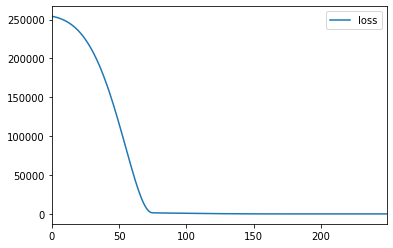

In [34]:
df.plot()

# Evaluation of the model

In [36]:
# model.evaluate : pass in test set, returns back the model's loss test set
model.evaluate(xtest,ytest,verbose=0)

25.860664611816407

In [37]:
# evaluating train set
model.evaluate(xtrain,ytrain,verbose=0)

24.56943655395508

In [38]:
# getting actual predictions
predictions = model.predict(xtest)

In [39]:
predictions

array([[485.5554 ],
       [630.79974],
       [617.87805],
       [335.46182],
       [598.73047],
       [561.7888 ],
       [414.91785],
       [399.98035],
       [525.9021 ],
       [650.9382 ],
       [600.266  ],
       [429.22983],
       [423.61386],
       [668.7633 ],
       [530.98596],
       [632.1158 ],
       [508.36694],
       [424.77588],
       [574.7885 ],
       [615.50635],
       [567.8222 ],
       [597.63275],
       [661.75543],
       [400.92398],
       [403.8784 ],
       [505.14502],
       [547.22034],
       [362.8265 ],
       [372.99402],
       [371.49313],
       [436.0662 ],
       [507.8587 ],
       [456.78546],
       [421.00806],
       [396.81766],
       [447.88843],
       [404.79446],
       [580.6378 ],
       [544.1481 ],
       [379.42267],
       [529.4086 ],
       [595.06964],
       [362.0174 ],
       [433.4364 ],
       [485.14993],
       [702.80225],
       [496.40524],
       [604.18384],
       [560.0108 ],
       [566.8418 ],


In [44]:
# reshape is used to convert the data into one dimensional data.
test_predictions = pd.Series(predictions.reshape(250,))
prediction_df = pd.DataFrame(ytest,columns=["Test True Y"])

In [45]:
prediction_df.head()

,Test True Y
0,477.430516
1,628.849404
2,618.933635
3,327.360241
4,591.869092


In [47]:
pred_df = pd.concat([prediction_df,test_predictions],axis=1)

In [48]:
pred_df.columns = ["Actual","Predicted"]

In [49]:
pred_df.head()

,Actual,Predicted
0,477.430516,485.555389
1,628.849404,630.799744
2,618.933635,617.878052
3,327.360241,335.461823
4,591.869092,598.730469


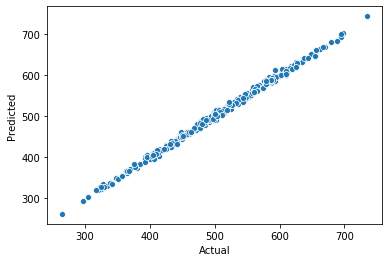

In [50]:
sns.scatterplot(x="Actual",y="Predicted",data=pred_df)

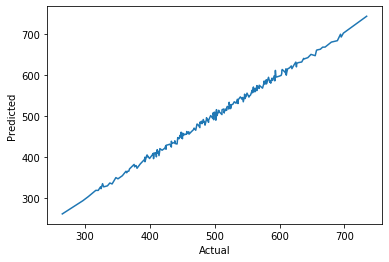

In [51]:
sns.lineplot(x="Actual",y="Predicted",data=pred_df)

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [55]:
mean_absolute_error(pred_df["Actual"],pred_df["Predicted"])

# on an avearge the prediction is varying by 4 dollars from the actual price.

4.002400854921318

In [54]:
mean_squared_error(pred_df["Actual"],pred_df["Predicted"])

25.860657044644263

In [56]:
# root mean squared error
mean_squared_error(pred_df["Actual"],pred_df["Predicted"]) ** 0.5

5.085337456319321

## Evaluating the model with random data

In [60]:
new_gem = [[998,1000]]

# converting to the form which is understoood by the model
new_gem = scaler.transform(new_gem)

In [61]:
model.predict(new_gem)

array([[420.31274]], dtype=float32)

### saving the model

In [62]:
from tensorflow.keras.models import load_model


In [63]:
model.save("example_model_house_price_prediction.h5")

In [64]:
loaded_model = load_model("example_model_house_price_prediction.h5")

In [65]:
loaded_model.predict(new_gem)

array([[420.31274]], dtype=float32)